# Thông tin

1.MSSV: 20520435

2.Họ tên: Nguyễn Duy Đạt

3.Bài tập: 3

4.Ngày thực hiện: 21/4/2022

# Bài tập 3

Tập dữ liệu Dog vs Cat:

– Áp dụng Linear classification cho đặc trưng Histogram

– Áp dụng KNN và Linear classification cho đặc
trưng HOG

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/CS231.M21.KHTN/Baitap/Dataset"

/content/drive/.shortcut-targets-by-id/13C37EedUSDnRymGA5rWpsqcry8w0txyr/CS231.M21.KHTN/Baitap/Dataset


In [ ]:
%cd "../Dataset/dogscats_small/train"

/content/drive/.shortcut-targets-by-id/13C37EedUSDnRymGA5rWpsqcry8w0txyr/CS231.M21.KHTN/Baitap/Dataset/dogscats_small/train


In [ ]:
import cv2
import os
import numpy as np

In [ ]:
def TinhHist(pathfilename):
  img = cv2.imread(pathfilename, 0)
  hist = cv2.calcHist([img], [0], None, [256], [0, 256])
  size = img.shape[0]*img.shape[1]
  return hist

In [ ]:
def ExtractFeature(pathfilename, opt):
  if opt==0:
    return TinhHist(pathfilename)
  if opt==1:
    return compute_hog_train(pathfilename)[0].reshape(-1)

In [ ]:
def ReadData(path, opt):
  kinds = []
  hist = []
  for file_name in os.listdir(path):
    kind = file_name.split('.')[0]
    if kind == 'dog':
      kinds.append(1)
    else:
      kinds.append(0)

    hist.append(ExtractFeature(path+'/'+file_name, opt).reshape(-1))

    features = np.array(hist)
    labels = np.array(kinds)
  return features, labels

In [ ]:
df_train = ReadData('../train', 0)

# Áp dụng Linear Classification cho đặc trưng Histogram

-Sử dụng SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
X_train = df_train[0]
y_train = df_train[1]

In [ ]:
print(X_train.shape)
y_train.shape

(42, 256)


(42,)

In [ ]:
df_test = ReadData('../test', 0)
X_test = df_test[0]
y_test = df_test[1]

In [ ]:
model = SVC()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print("Accuracy on Train:", accuracy_score(y_train, y_train_pred))
y_test_pred = model.predict(X_test)
print("Accuracy on Test:", accuracy_score(y_test, y_test_pred))

Accuracy on Train: 0.8333333333333334
Accuracy on Test: 0.55


-Sử dụng KNN

In [ ]:
for i in range(1, 20):
  print('k =', i, ':')
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_train_pred = knn.predict(X_train)
  print("Accuracy on Train:", accuracy_score(y_train, y_train_pred))
  y_test_pred = knn.predict(X_test)
  print("Accuracy on Test:", accuracy_score(y_test, y_test_pred))
  print("-------------------------------------------------")

k = 1 :
Accuracy on Train: 1.0
Accuracy on Test: 0.45
-------------------------------------------------
k = 2 :
Accuracy on Train: 0.6904761904761905
Accuracy on Test: 0.65
-------------------------------------------------
k = 3 :
Accuracy on Train: 0.7619047619047619
Accuracy on Test: 0.65
-------------------------------------------------
k = 4 :
Accuracy on Train: 0.6190476190476191
Accuracy on Test: 0.6
-------------------------------------------------
k = 5 :
Accuracy on Train: 0.6904761904761905
Accuracy on Test: 0.45
-------------------------------------------------
k = 6 :
Accuracy on Train: 0.6428571428571429
Accuracy on Test: 0.65
-------------------------------------------------
k = 7 :
Accuracy on Train: 0.7380952380952381
Accuracy on Test: 0.55
-------------------------------------------------
k = 8 :
Accuracy on Train: 0.7142857142857143
Accuracy on Test: 0.6
-------------------------------------------------
k = 9 :
Accuracy on Train: 0.7142857142857143
Accuracy on Test: 0

# Áp dụng KNN và Linear classification cho đặc trưng HOG

In [ ]:
from skimage import feature

def compute_hog_train(pathfilename):
  train_features = []
  img = cv2.imread(pathfilename)
  img =cv2.resize(img, (128, 256))
  (hog, hog_image) = feature.hog(img, orientations=9, 
  pixels_per_cell=(8, 8), cells_per_block=(2, 2), 
  block_norm='L2-Hys', visualize=True, transform_sqrt=True)
  train_features.append(hog)
  return train_features

In [ ]:
df_train = ReadData('../train', 1)

In [ ]:
X_train = df_train[0]
y_train = df_train[1]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df_test = ReadData('../test', 1)
X_test = df_test[0]
y_test = df_test[1]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
for i in range(1, 20):
  print('k =', i, ':')
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_train_pred = knn.predict(X_train)
  print("Accuracy on Train:", accuracy_score(y_train, y_train_pred))
  y_test_pred = knn.predict(X_test)
  print("Accuracy on Test:", accuracy_score(y_test, y_test_pred))
  print("-------------------------------------------------")

k = 1 :
Accuracy on Train: 1.0
Accuracy on Test: 0.65
-------------------------------------------------
k = 2 :
Accuracy on Train: 0.9047619047619048
Accuracy on Test: 0.65
-------------------------------------------------
k = 3 :
Accuracy on Train: 0.6666666666666666
Accuracy on Test: 0.55
-------------------------------------------------
k = 4 :
Accuracy on Train: 0.7380952380952381
Accuracy on Test: 0.6
-------------------------------------------------
k = 5 :
Accuracy on Train: 0.6904761904761905
Accuracy on Test: 0.55
-------------------------------------------------
k = 6 :
Accuracy on Train: 0.7380952380952381
Accuracy on Test: 0.55
-------------------------------------------------
k = 7 :
Accuracy on Train: 0.6666666666666666
Accuracy on Test: 0.45
-------------------------------------------------
k = 8 :
Accuracy on Train: 0.7380952380952381
Accuracy on Test: 0.45
-------------------------------------------------
k = 9 :
Accuracy on Train: 0.6428571428571429
Accuracy on Test: 

Text(0, 0.5, 'Error Rate')

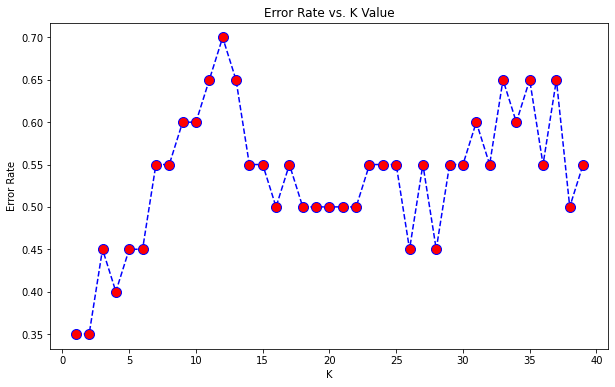

In [ ]:
error_rate = []
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')